In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Create synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term (x0 = 1) to each instance
X_b = np.c_[np.ones((100, 1)), X]

# Function to compute the cost
def compute_cost(theta, X_b, y):
    m = len(y)
    return (1/m) * np.sum((X_b.dot(theta) - y)**2)

# Function to plot contours
def plot_contours(X_b, y):
    theta0_vals = np.linspace(0, 8, 100)
    theta1_vals = np.linspace(0, 5, 100)
    J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

    for i in range(len(theta0_vals)):
        for j in range(len(theta1_vals)):
            t = np.array([theta0_vals[i], theta1_vals[j]]).reshape(-1, 1)
            J_vals[i, j] = compute_cost(t, X_b, y)

    theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)
    plt.contour(theta0_vals, theta1_vals, J_vals.T, levels=np.logspace(-1, 3, 20))
    plt.xlabel(r'$\theta_0$')
    plt.ylabel(r'$\theta_1$')


In [18]:
# Standard Gradient Descent
def gradient_descent(X_b, y, learning_rate=0.1, n_iterations=1000):
    m = len(y)
    theta = np.random.randn(2, 1)
    theta_path = [theta]

    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learning_rate * gradients
        theta_path.append(theta)

    return theta, theta_path

# Stochastic Gradient Descent
def stochastic_gradient_descent(X_b, y, learning_rate=0.1, n_epochs=50):
    m = len(y)
    theta = np.random.randn(2, 1)
    theta_path = [theta]

    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - learning_rate * gradients
            theta_path.append(theta)

    return theta, theta_path

# Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X_b, y, learning_rate=0.1, n_iterations=200, batch_size=20):
    m = len(y)
    theta = np.random.randn(2, 1)
    theta_path = [theta]

    for iteration in range(n_iterations):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, m, batch_size):
            xi = X_b_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradients = 2/batch_size * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - learning_rate * gradients
            theta_path.append(theta)

    return theta, theta_path

# Adagrad
def adagrad(X_b, y, learning_rate=0.1, n_iterations=1000, epsilon=1e-8):
    m = len(y)
    theta = np.random.randn(2, 1)
    theta_path = [theta]
    gradient_squares = np.zeros((2, 1))

    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        gradient_squares += gradients ** 2
        theta = theta - (learning_rate / (np.sqrt(gradient_squares + epsilon))) * gradients
        theta_path.append(theta)

    return theta, theta_path

# RMSProp
def rmsprop(X_b, y, learning_rate=0.01, n_iterations=1000, beta=0.9, epsilon=1e-8):
    m = len(y)
    theta = np.random.randn(2, 1)
    theta_path = [theta]
    gradient_squares = np.zeros((2, 1))

    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        gradient_squares = beta * gradient_squares + (1 - beta) * gradients ** 2
        theta = theta - (learning_rate / (np.sqrt(gradient_squares + epsilon))) * gradients
        theta_path.append(theta)

    return theta, theta_path

# Adam
def adam(X_b, y, learning_rate=0.01, n_iterations=1000, beta1=0.9, beta2=0.999, epsilon=1e-8):
    m = len(y)
    theta = np.random.randn(2, 1)
    theta_path = [theta]
    m_t = np.zeros((2, 1))
    v_t = np.zeros((2, 1))

    for t in range(1, n_iterations + 1):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        m_t = beta1 * m_t + (1 - beta1) * gradients
        v_t = beta2 * v_t + (1 - beta2) * gradients ** 2
        m_hat = m_t / (1 - beta1 ** t)
        v_hat = v_t / (1 - beta2 ** t)
        theta = theta - (learning_rate / (np.sqrt(v_hat + epsilon))) * m_hat
        theta_path.append(theta)

    return theta, theta_path


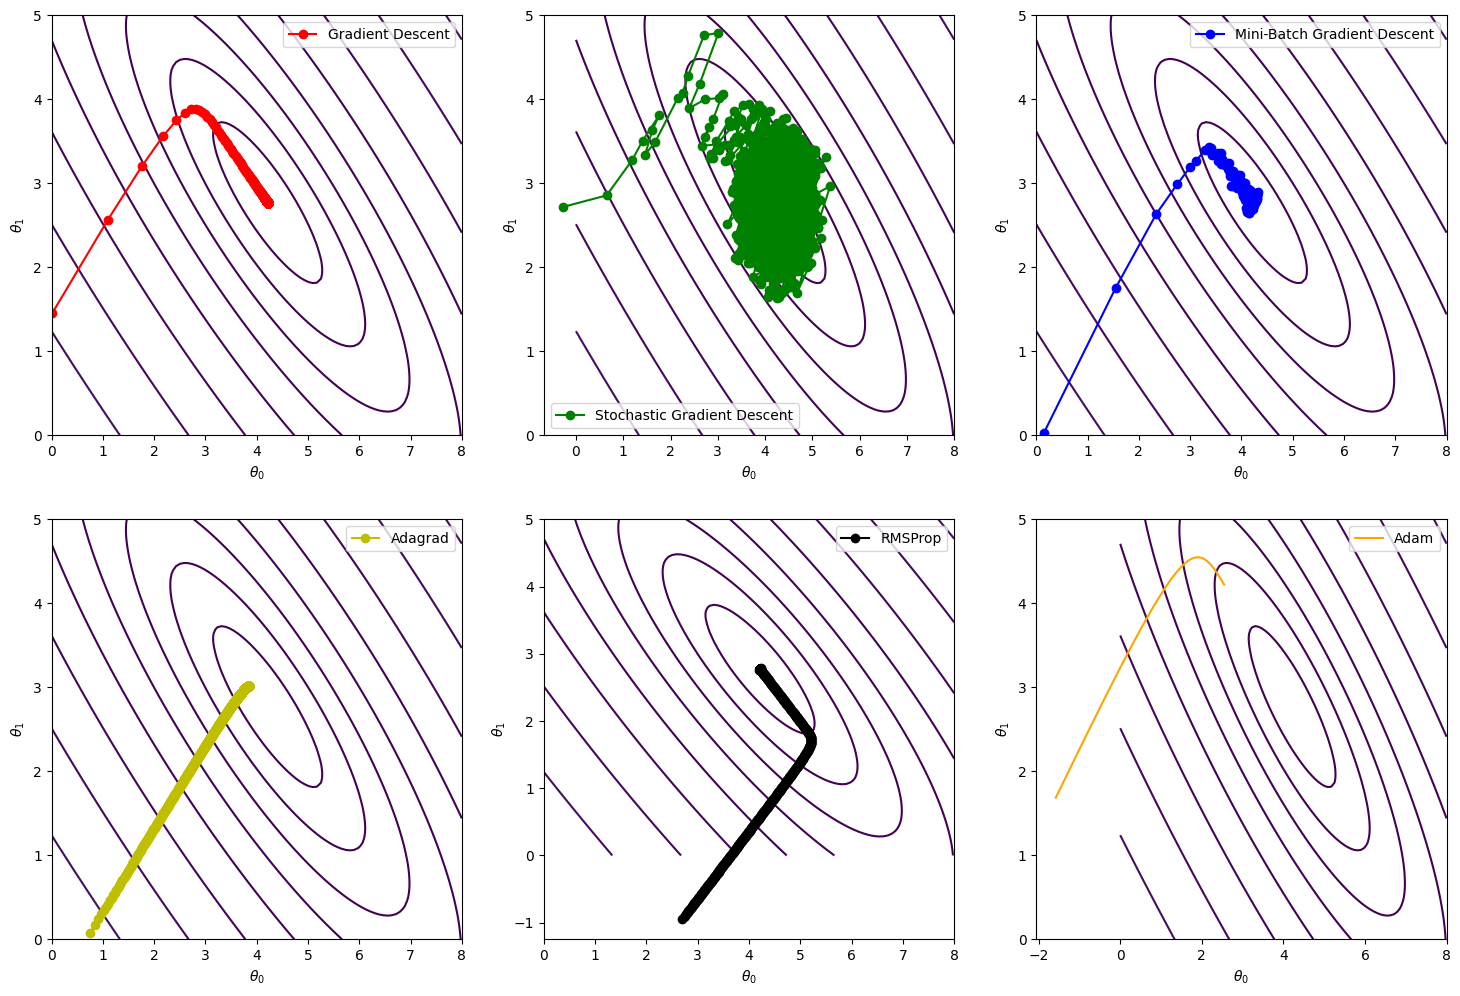

In [19]:
# Running gradient descent variants
theta_gd, theta_path_gd = gradient_descent(X_b, y)
theta_sgd, theta_path_sgd = stochastic_gradient_descent(X_b, y)
theta_mbgd, theta_path_mbgd = mini_batch_gradient_descent(X_b, y)
theta_adagrad, theta_path_adagrad = adagrad(X_b, y)
theta_rmsprop, theta_path_rmsprop = rmsprop(X_b, y)
theta_adam, theta_path_adam = adam(X_b, y)

# Plotting contours and paths
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plot_contours(X_b, y)
theta_path_gd = np.array(theta_path_gd)
plt.plot(theta_path_gd[:, 0], theta_path_gd[:, 1], 'r-o', label="Gradient Descent")
plt.legend()

plt.subplot(2, 3, 2)
plot_contours(X_b, y)
theta_path_sgd = np.array(theta_path_sgd)
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], 'g-o', label="Stochastic Gradient Descent")
plt.legend()

plt.subplot(2, 3, 3)
plot_contours(X_b, y)
theta_path_mbgd = np.array(theta_path_mbgd)
plt.plot(theta_path_mbgd[:, 0], theta_path_mbgd[:, 1], 'b-o', label="Mini-Batch Gradient Descent")
plt.legend()

plt.subplot(2, 3, 4)
plot_contours(X_b, y)
theta_path_adagrad = np.array(theta_path_adagrad)
plt.plot(theta_path_adagrad[:, 0], theta_path_adagrad[:, 1], 'y-o', label="Adagrad")
plt.legend()

plt.subplot(2, 3, 5)
plot_contours(X_b, y)
theta_path_rmsprop = np.array(theta_path_rmsprop)
plt.plot(theta_path_rmsprop[:, 0], theta_path_rmsprop[:, 1], 'k-o', label="RMSProp")
plt.legend()

plt.subplot(2, 3, 6)
plot_contours(X_b, y)
theta_path_adam = np.array(theta_path_adam)
plt.plot(theta_path_adam[:, 0], theta_path_adam[:, 1], 'orange', label="Adam")
plt.legend()

plt.show()
